# Animal Classification - The Oxford-IIIT Pet Dataset

**Submission deadline: Friday 21 April, 11:55pm**

**Assessment weight: 15% of the total unit assessment.**

**Versions**
  - 2023-03-27 V1.0: Initial release

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end image classification application. We will train and test the data using the Oxford-III Pet Dataset:

- https://www.robots.ox.ac.uk/~vgg/data/pets/

This is a small dataset with 37 breeds of cats and dogs. Please download the image files and annotations from the above link, and unzip it on your work directory. This will create the following two directories:

- `images` - Images saved as jpg files, one file per image.
- `annotations` - Image annotations for image segmentation, object detection, and image classification. The annotations are explained in the file `annotations/README`. Please read the file so that you understand how to use these annotations. In this assignment, we will only use the annotations for image classification.

# Connect to GitHub Classroom

Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/LuWneNQe
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2023S1/repositories
5. In contrast with assignment 1 and the practical sessions, your assignment repository will be empty and will not include starter code. you need to add this Jupyter notebook and commit the changes.

Please use the github repository linked to this GitHub classroom. Make sure that you continuously push commits and you provide useful commit comments. **1 mark of the assessment of this assignment is related to good practice with the use of GitHub.**


## Task 1 (4 marks) - Data preparation and exploration

### 1.1 (1 mark)

The `annotations` directory has the files `trainval.txt` and `test.txt`. Write Python code that counts the number of samples for each of the 37 categories in each of these files. In a MarkDown text cell, answer these questions, providing a justification:

1. Are the data balanced? Comment on whether there are any categories with an unusually large or small number of samples, relative to the other categories.
2. Are there any significant differences in the distribution of categories in `trainval.txt` with respect to `test.txt`?

before we can answer these questions we must understand the data that is available to us, although there is information given on the site when downloading the data it is still ideal to still check as their data pools may change 
so the steps taken is to identify 
* Label identifiers/names
* count how many images per label
* how many images per category of cat or dog


In [1]:
import glob
import os
import collections
import pandas as pd

### <ol style="font-size:40px; color:red"> Label Identifiers/names

### list for reference to check if my function works and compare if files stored have the same

1. Abyssinian
2. american_bulldog
3. american_pit_bull_terrier
4. basset_hound
5. beagle
6. Bengal
7. Birman
8. Bombay
9. boxer
10. British_Shorthair
11. chihuahua
12. Egyptian_Mau
13. english_cocker_spaniel
14. english_setter
15. german_shorthaired
16. great_pyrenees
17. havanese
18. japanese_chin
19. keeshond
20. leonberger
21. Maine_Coon
22. miniature_pinscher
23. newfoundland
24. Persian
25. pomeranian
26. pug
27. Ragdoll
28. Russian_Blue
29. saint_bernard
30. samoyed
31. scottish_terrier
32. shiba_inu
33. Siamese
34. Sphynx
35. staffordshire_bull_terrier
36. wheaten_terrier
37. yorkshire_terrier


Although the list was provided from the website where the data was sourced from, I believe it is still good practice to try and find all the Label Names incase of change or errors

Looking through the folder containing the different images of Cats and Dogs, we can see that they are labeled by their Class_ID as stated in the the classifcation lists both on their site and in their "list.txt" file 

for ease of classification we will need to clean the names and strips them apart from the end containing their number and ".jpg"

and so the function "get_class_names()" grabs the last instance of "_" and splits it storing the string to the left as a label, finally sorting it albaphetically and by case to match the similarity of the folder images 


In [2]:
# function declaration 
path = "images"

def get_class_names(dir_path):

    class_names = []
    for file_name in os.listdir(dir_path):
        if file_name.endswith('.jpg'):
            class_name = file_name.rsplit('_', 1)[0].rstrip()
            if class_name not in class_names:
                class_names.append(class_name)

    class_names.sort(key=str.lower)
    return class_names


we can now create a list called "label_Names" this will be used continuously throughout the analysis and training 

by comparing the list printed we can see that we have the right labels.

In [3]:
label_Names = get_class_names(path)
print(label_Names)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


### <ol style="font-size:30px; color:red"> Counting images per label
in this section I wanted to see if the dataset both matches what was shown on the source website and also help identify if the data is evenly distrobuted from 
1. Breed Distrobution 
2. Cats and Dogs 

to do this i created "count_images_by_classifier" to count the amount of times the the classifier appears in a path against a list (which contains the classiers to count against this being label_Names) 

In [4]:
def count_images_by_classifier(path, list):
    """
    Count the number of images in a directory, grouped by classifier name
    :param path: the path to the directory containing the image files
    :param label_names: a list of label names, where the index of each name corresponds to the label index in the filenames
    :return: a dictionary with the counts of images for each classifier name
    """
    classifiers = collections.defaultdict(int)  # use defaultdict to avoid key errors

    for filepath in glob.glob(os.path.join(path, "*.jpg")):
        filename = os.path.basename(filepath)
        for label in list:
            if label in filename:
                classifiers[label] += 1
                break

    return dict(classifiers)
    

In [5]:
counts = count_images_by_classifier(path, label_Names)
print(counts)

{'Abyssinian': 200, 'american_bulldog': 200, 'american_pit_bull_terrier': 200, 'basset_hound': 200, 'beagle': 200, 'Bengal': 200, 'Birman': 200, 'Bombay': 200, 'boxer': 200, 'British_Shorthair': 200, 'chihuahua': 200, 'Egyptian_Mau': 200, 'english_cocker_spaniel': 200, 'english_setter': 200, 'german_shorthaired': 200, 'great_pyrenees': 200, 'havanese': 200, 'japanese_chin': 200, 'keeshond': 200, 'leonberger': 200, 'Maine_Coon': 200, 'miniature_pinscher': 200, 'newfoundland': 200, 'Persian': 200, 'pomeranian': 200, 'pug': 200, 'Ragdoll': 200, 'Russian_Blue': 200, 'saint_bernard': 200, 'samoyed': 200, 'scottish_terrier': 199, 'shiba_inu': 200, 'Siamese': 200, 'Sphynx': 200, 'staffordshire_bull_terrier': 191, 'wheaten_terrier': 200, 'yorkshire_terrier': 200}


this list is hard to read but generally looks evenly balanced for count on classifiers below simply lists them in a column to help read and shows that it does look evenly skewed with only two classifiers being less by no more then 10 

In [6]:

def create_dataframe(class_dict):
    df = pd.DataFrame(list(class_dict.items()), columns=['Class', 'Count'])
    return df

In [7]:
class_Count = create_dataframe(counts)
print(class_Count)

                         Class  Count
0                   Abyssinian    200
1             american_bulldog    200
2    american_pit_bull_terrier    200
3                 basset_hound    200
4                       beagle    200
5                       Bengal    200
6                       Birman    200
7                       Bombay    200
8                        boxer    200
9            British_Shorthair    200
10                   chihuahua    200
11                Egyptian_Mau    200
12      english_cocker_spaniel    200
13              english_setter    200
14          german_shorthaired    200
15              great_pyrenees    200
16                    havanese    200
17               japanese_chin    200
18                    keeshond    200
19                  leonberger    200
20                  Maine_Coon    200
21          miniature_pinscher    200
22                newfoundland    200
23                     Persian    200
24                  pomeranian    200
25          

## <ol style="font-size:40px; color:red"> Seperate the classifications into categories cat and dog 

to help seperate from Cats and Dogs, the source has seperated them by a initial capitalisation of the first letter and so we are able to use this information and by both manually view a few files that this is true, to automate this on a scalable matter if future sources are to expand or be implemented i created a simple function "categorize_labels" which takes a list and seperates the names into 2 lists one for Cats and one for Dogs following the same capitialisation method outlined.


In [8]:
def categorize_labels(label_names):
    cat_labels = []
    dog_labels = []
    for label in label_names:
        if label[0].isupper():
            cat_labels.append(label)
        else:
            dog_labels.append(label)
    return cat_labels, dog_labels

In [9]:
cat_labels, dog_labels = categorize_labels(label_Names)
print("Cat Labels:", cat_labels)
print("Dog Labels:", dog_labels)

Cat Labels: ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']
Dog Labels: ['american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


following the same methods above for counting and ease of reading i pushed these newly made lists to see if there was an even distrobution between data for cats and dogs.

In [10]:
cat_count = count_images_by_classifier(path, cat_labels)
dog_count = count_images_by_classifier(path, dog_labels)


cat_df = create_dataframe(cat_count)
dog_df = create_dataframe(dog_count)
print("Cats",cat_df)
print("Dogs",dog_df)

Cats                 Class  Count
0          Abyssinian    200
1              Bengal    200
2              Birman    200
3              Bombay    200
4   British_Shorthair    200
5        Egyptian_Mau    200
6          Maine_Coon    200
7             Persian    200
8             Ragdoll    200
9        Russian_Blue    200
10            Siamese    200
11             Sphynx    200
Dogs                          Class  Count
0             american_bulldog    200
1    american_pit_bull_terrier    200
2                 basset_hound    200
3                       beagle    200
4                        boxer    200
5                    chihuahua    200
6       english_cocker_spaniel    200
7               english_setter    200
8           german_shorthaired    200
9               great_pyrenees    200
10                    havanese    200
11               japanese_chin    200
12                    keeshond    200
13                  leonberger    200
14          miniature_pinscher    200
15   

In [11]:
def categorize_total(counts):
    cat_dog_counts = {"cat": 0, "dog": 0}
    for label in counts.keys():
        count = counts[label]
        if label[0].isupper():
            cat_dog_counts["cat"] += count
        else:
            cat_dog_counts["dog"] += count
    return cat_dog_counts

In [12]:
print(categorize_total(counts))

{'cat': 2400, 'dog': 4990}


### <ol style="font-size:40px; color:red"> interpritation of data found 1.1.1
Although from initial investigation we can see that each classification has an even distribution for each breed of roughly 200 per breed. However it is not ideal when trying to get enough information for categotising between Cats and Dogs as there is around 2400 counts of cats and around 5000 coutns for dogs 

i wanted to assess if after seporating the information into groups for training and testing purposes that there would be equal distrobution for all breeds

although concept is similar i had to adjust my count by classifier function to work with a list from a ".txt" file and so created "count_txt_by_classifier" 


In [13]:

def count_txt_by_classifier(filepath, label_names):
    """
    Count the number of images in a text file, grouped by classifier name
    :param filepath: the path to the text file containing the image filenames
    :param label_names: a list of label names, where the index of each name corresponds to the label index in the filenames
    :return: a dictionary with the counts of images for each classifier name
    """
    classifiers = collections.defaultdict(int)  # use defaultdict to avoid key errors

    with open(filepath, "r") as file:
        for line in file:
            filename = line.strip().split()[0]
            for label in label_names:
                if label in filename:
                    classifiers[label] += 1
                    break

    return dict(classifiers)

In [14]:
train_Breed_Count = count_txt_by_classifier('annotations/trainval.txt',label_Names)
print(train_Breed_Count)
test_Breed_Count = count_txt_by_classifier('annotations/test.txt',label_Names)
print(test_Breed_Count)

{'Abyssinian': 100, 'american_bulldog': 100, 'american_pit_bull_terrier': 100, 'basset_hound': 100, 'beagle': 100, 'Bengal': 100, 'Birman': 100, 'Bombay': 96, 'boxer': 100, 'British_Shorthair': 100, 'chihuahua': 100, 'Egyptian_Mau': 93, 'english_cocker_spaniel': 96, 'english_setter': 100, 'german_shorthaired': 100, 'great_pyrenees': 100, 'havanese': 100, 'japanese_chin': 100, 'keeshond': 100, 'leonberger': 100, 'Maine_Coon': 100, 'miniature_pinscher': 100, 'newfoundland': 96, 'Persian': 100, 'pomeranian': 100, 'pug': 100, 'Ragdoll': 100, 'Russian_Blue': 100, 'saint_bernard': 100, 'samoyed': 100, 'scottish_terrier': 100, 'shiba_inu': 100, 'Siamese': 99, 'Sphynx': 100, 'staffordshire_bull_terrier': 100, 'wheaten_terrier': 100, 'yorkshire_terrier': 100}
{'Abyssinian': 98, 'american_bulldog': 100, 'american_pit_bull_terrier': 100, 'basset_hound': 100, 'beagle': 100, 'Bengal': 100, 'Birman': 100, 'Bombay': 88, 'boxer': 99, 'British_Shorthair': 100, 'chihuahua': 100, 'Egyptian_Mau': 97, 'eng

In [15]:
print("trainval.txt: ",categorize_total(train_Breed_Count))
print("test.txt: ",categorize_total(test_Breed_Count))

trainval.txt:  {'cat': 1188, 'dog': 2492}
test.txt:  {'cat': 1183, 'dog': 2486}


### <ol style="font-size:40px; color:red">  Interpritation of information for 1.1.2

based on the count of classification names of breed and of the categories of cat's and dog's the spread does seem to be similar enough for breeds, however there is still a uneven skewe for dogs having roughly 2/3 of the dataset against the cats only having 1/3 

this can still make for accurate classifiers however as there is more data of dogs will find that the accuracy of dogs will tend to be significantly more accurate then cats as there is more to train off

### 1.2 (1 mark)

Display 10 random images from the "trainval" data and the "test" data.

In [16]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

def display_rnd_img(txtName):
    # read file names from txtName, ignoring lines that start with '#'
    with open(txtName) as f:
        lines = [line.strip() for line in f if not line.startswith('#')]
    # randomly choose 10 file names
    filenames = random.sample(lines, 10)
    # load images from filenames that exist
    img_data = [plt.imread(os.path.join('images', f"{line.split()[0]}.jpg")) for line in filenames 
                if os.path.isfile(os.path.join('images', f"{line.split()[0]}.jpg"))]
    # display images
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        if i < len(img_data):
            ax.imshow(img_data[i], cmap='gray')
        ax.axis('off')
    fig.suptitle(os.path.splitext(os.path.basename(txtName))[0], fontsize=16)
    plt.show()


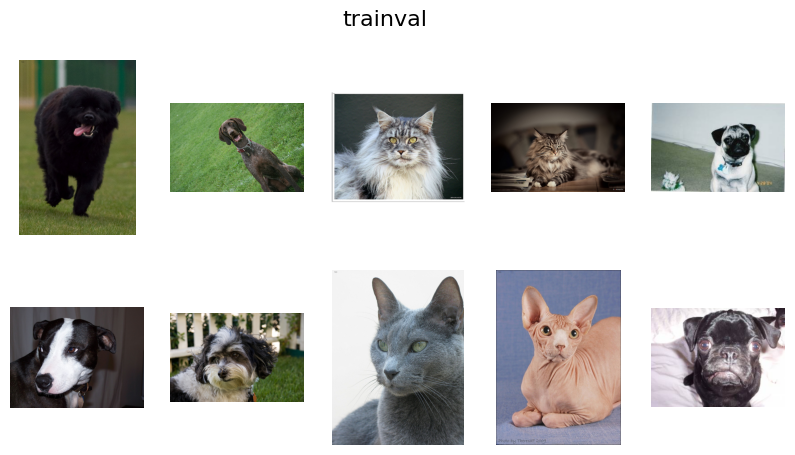

None


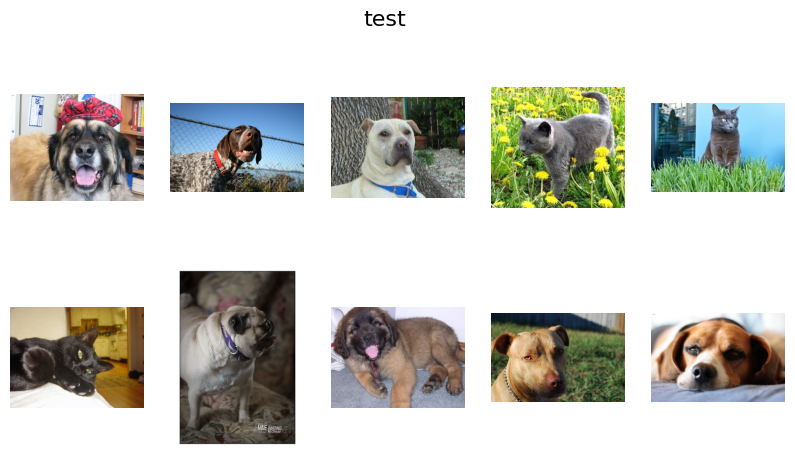

None


In [17]:
print(display_rnd_img('annotations/trainval.txt'))
print(display_rnd_img('annotations/test.txt'))

### 1.3 (1 mark)

Split the `annotations/test.txt` list of files into `validation.txt` and `newtest.txt` so that half of the items in each category falls into `validation.txt`, and the other half into `newtest.txt`. It is up to you how to do the splitting, but make sure that the distribution of categories in each is similar. Show the distribution of category counts on the resulting `validation.txt` and `newtest.txt` to demonstrate that the distribution of category counts is half/half.

To facilitate the next tasks, make sure that the files `validation.txt` and `newtest.txt` contain the full path of the image files relative to the folder where this notebook is located, for example, the first lines of `validation.txt` might be like this:

```
images/Abyssinian_99.jpg 1 1 1
images/Abyssinian_25.jpg 1 1 1
images/Abyssinian_78.jpg 1 1 1
images/Abyssinian_86.jpg 1 1 1
```

Also to facilitate the next tasks of this assignment, write Python code that rewrites the contents of `annotations/trainval.txt` into a new file `training.txt` that also contains the full relative path of the images.

The following are sample files. Your files should look similar to these.
- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

Creating copy of annotations/trainval.txt to training.txt while keeping the directories to the images 
example 
```
Abyssinian_99 1 1 1
Abyssinian_25 1 1 1
Abyssinian_78 1 1 1
Abyssinian_86 1 1 1
```
to

```
images/Abyssinian_99.jpg 1 1 1
images/Abyssinian_25.jpg 1 1 1
images/Abyssinian_78.jpg 1 1 1
images/Abyssinian_86.jpg 1 1 1
```
 

In [18]:
# reads annotations/test.txt. writes 2 new files in main directory - validation.txt and newtest.txt
with open('annotations/test.txt', 'r') as f, \
     open('validation.txt', 'w') as val_f, \
     open('newtest.txt', 'w') as new_f:
     
    # loops over every line and seperates the files alternatively putting one line in validation file then the next in newtest 
    for i, line in enumerate(f):
        # even lines go to validation.txt
        if i % 2 == 0:
            img_path, *labels = line.split()
            img_path = f"images/{img_path}.jpg"
            new_line = f"{img_path} {' '.join(labels)}\n"
            val_f.write(new_line)
        # odd lines go to newtest.txt
        else:
            img_path, *labels = line.split()
            img_path = f"images/{img_path}.jpg"
            new_line = f"{img_path} {' '.join(labels)}\n"
            new_f.write(new_line)
# converting trainval.txt line for line to new file training.txt
with open('annotations/trainval.txt', 'r') as f, \
     open('training.txt', 'w') as new_f:
        for i, line in enumerate(f):
            img_path, *labels = line.split()
            img_path = f"images/{img_path}.jpg"
            new_line = f"{img_path} {' '.join(labels)}\n"
            new_f.write(new_line)


In [19]:
newTest_Breed_Count = count_txt_by_classifier('newtest.txt',label_Names)
print(newTest_Breed_Count)
valid_Breed_Count = count_txt_by_classifier('validation.txt',label_Names)
print(valid_Breed_Count)

{'Abyssinian': 49, 'american_bulldog': 50, 'american_pit_bull_terrier': 50, 'basset_hound': 50, 'beagle': 50, 'Bengal': 50, 'Birman': 50, 'Bombay': 44, 'boxer': 49, 'British_Shorthair': 50, 'chihuahua': 50, 'Egyptian_Mau': 49, 'english_cocker_spaniel': 50, 'english_setter': 50, 'german_shorthaired': 50, 'great_pyrenees': 50, 'havanese': 50, 'japanese_chin': 50, 'keeshond': 49, 'leonberger': 50, 'Maine_Coon': 50, 'miniature_pinscher': 50, 'newfoundland': 50, 'Persian': 50, 'pomeranian': 50, 'pug': 50, 'Ragdoll': 50, 'Russian_Blue': 50, 'saint_bernard': 50, 'samoyed': 50, 'scottish_terrier': 50, 'shiba_inu': 50, 'Siamese': 50, 'Sphynx': 50, 'staffordshire_bull_terrier': 44, 'wheaten_terrier': 50, 'yorkshire_terrier': 50}
{'Abyssinian': 49, 'american_bulldog': 50, 'american_pit_bull_terrier': 50, 'basset_hound': 50, 'beagle': 50, 'Bengal': 50, 'Birman': 50, 'Bombay': 44, 'boxer': 50, 'British_Shorthair': 50, 'chihuahua': 50, 'Egyptian_Mau': 48, 'english_cocker_spaniel': 50, 'english_sette

In [20]:
print("newtest.txt: ",categorize_total(newTest_Breed_Count))
print("validation.txt: ",categorize_total(valid_Breed_Count))

newtest.txt:  {'cat': 592, 'dog': 1242}
validation.txt:  {'cat': 591, 'dog': 1244}


1.3 break down 
we can see that through openign the files we created and by analysing the spread by using the functions created that both files contain similar numbers however still skewed in this instance double the dogs then cats 

thought: it may be better to create a method that ensures there is equal amounts of cats and dogs per training cycle however unsure if that will cause overfitting for cats to be memoriesed rather then learnt 

### 1.4 (1 mark)

Use TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 200x200, and the values of the pixels are normalised to the range [0, 1]. For this task and following tasks in this assignment, use the files we provide:

- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

In [21]:
import tensorflow as tf
import numpy as np

# Define some constants
IMG_HEIGHT = 200
IMG_WIDTH = 200
NUM_CLASSES = 37

# do not need currently as i cant figure how to make it train effeciently with all 3 labels 
# NUM_SPECIES = 2
# NUM_BREEDS = 25

BATCH_SIZE = 64

# varify for reference labels and their names 
# print("labels: ",label_Names)
# print("cat labels: ",cat_labels )
# print("dog labels: ",dog_labels )

In [22]:
# Load the dataset from the text file
def load_dataset(filepath):
    dataset = tf.data.TextLineDataset(filepath)
    return dataset

"""
 example of how the information is stored in the .txt file 
 images/Abyssinian_205.jpg 1 1 1
 images/american_bulldog_20.jpg 2 2 1
 how the labels are broken down after image path
 Image CLASS-ID SPECIES BREED-ID
 CLASS-ID: 1:37 Class ids (index for label_Names list)
 SPECIES: 1:Cat 2:Dog 
 BREED-ID: 1-25:Dog 1:12:Cat (index for dog_Labels and cat_Labels)

 NOTE: Breed-ID was wrong way around in list.txt file outliers
"""

def parse_line(line):
    # Split the line into its components
    split_line = tf.strings.split(line, ' ')
    image_path = split_line[0]
    class_id = tf.strings.to_number(split_line[1], tf.int32) - 1  
    # dont need to use these unless i can find a way to implement into training model without tanking the numbers to less then 0.^10
    species = tf.strings.to_number(split_line[2], tf.int32) - 1 
    breed_id = tf.strings.to_number(split_line[3], tf.int32) - 1 
    
    # Load and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.cast(image, tf.float32) / 255.0


    # Create the label
    class_label = tf.one_hot(class_id, depth=NUM_CLASSES)


    # chatGPT prompt "adjust data classification to include all 3 labels for training purposes"(i then included all this segments code as reference) to include all labels from text file (hopes to train against all for more accuracy) 
    # - on attempting made accuracy worse so will revert back to working but very bad SNN
    # Below is the information generated by chat GPT - it makes sense however when adjusting the model and running i recieved lower then 0.^10 readings so reverted back - just including for research purposes 
                                # species_label = tf.one_hot(species, depth=NUM_SPECIES)
                                # breed_label = tf.one_hot(breed_id, depth=NUM_BREEDS)
                                # label = tf.concat([class_label, species_label, breed_label], axis=-1)
    
    # Create the label
    label = tf.one_hot(class_id, depth=NUM_CLASSES)

    return image, label

# Process the dataset
def process_dataset(dataset):
    dataset = dataset.map(parse_line)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

# Load the training, validation, and test datasets
train_dataset = process_dataset(load_dataset('training.txt'))
val_dataset = process_dataset(load_dataset('validation.txt'))
test_dataset = process_dataset(load_dataset('newtest.txt'))


# Print some information about the datasets
train_size = 0
for images, labels in train_dataset:
    train_size += images.shape[0]
print('Train dataset size:', train_size)

Train dataset size: 3680


now the datasets have been made, i just wanted to make sure before training that nothing had been mixed or corrupted by my code and so i am printing out the first 10 images from test_dataset to see if everything still is alligned, i use the first 10 as i know they should all be abyssinian cats and so if they arent labeled right i can assume they are all wrong - i also test this with random and it looked fine however took more time to figure if still accurate as i had to manually check 

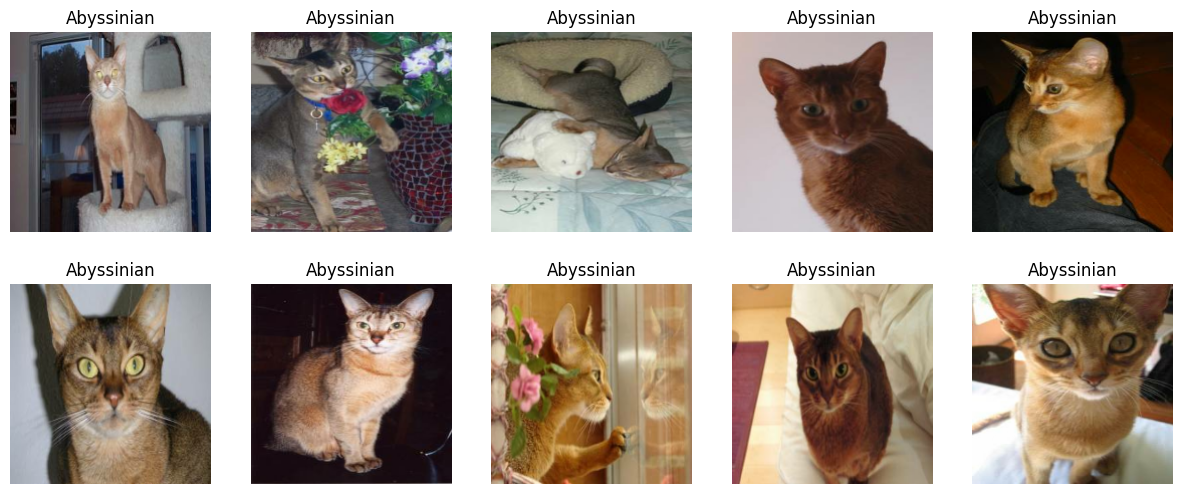

In [23]:
# Get the first 10 images and labels from the test dataset
test_images = []
test_labels = []
for image_batch, label_batch in test_dataset.take(10):
    for i in range(len(image_batch)):
        test_images.append(image_batch[i])
        test_labels.append(label_batch[i])

# Plot the first 10 images and labels in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    # Display the image and label
    ax.imshow(test_images[i])
    ax.set_title(label_Names[np.argmax(test_labels[i])])
    ax.axis('off')

plt.show()


## Task 2 (4 marks) - A simple classifier

Implement a simple classifier that uses these layers. You need to decide a reasonable ordering of the layers, and reasonable values of the various parameters in each layer.

- Dense layers.
- Dropout.
- Final classification.

The task will be composed of the following subtasks.

### 2.1 (2 marks)

Create a simple model that just contains the following two layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function.

Then, train the model with the training data. Use the validation data to determine when to stop training. Determine whether the system is overfitting and at what point in the training stage (if it is overfitting).

Finally, test the trained model on the test data and report the accuracy results.

Do not worry if you see error messages of the form "corrupt JPEG data". The reason for this is that some of the images are not in the JPEG format. Feel free to remove these images (a web search will help you find the images from this set that do not have the correct JPEG format), or just ignore the errors.

Also, you will probably obtain a very low accuracy, don't worry about that. Later you will try to improve it.

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [76]:
simple_Model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dropout(rate=0.5),
    Dense(NUM_CLASSES, activation='softmax')
])
# softmax got roughly 4-5% accuracy on prediction
# through trail and error found that relu breaks the prediction and training to always be a terriar 


# #attempt to try and include 3 labels in training simple neural network however accuracy tanked to below calculation can show " accuracy: 0.0000e+00" so will drop but keep for record of attempt 
# simple_Model = Sequential([
#     Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#     Dense(NUM_CLASSES + NUM_SPECIES + NUM_BREEDS, activation='softmax')
# ])

# Compile the model
simple_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

simple_Model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 120000)            0         
                                                                 
 dropout_5 (Dropout)         (None, 120000)            0         
                                                                 
 dense_8 (Dense)             (None, 37)                4440037   
                                                                 
Total params: 4,440,037
Trainable params: 4,440,037
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Train the model
simple_History = simple_Model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
58/58 [==============================] - 8s 140ms/step - loss: 174.8862 - accuracy: 0.0016 - val_loss: 58.1505 - val_accuracy: 0.0365
Epoch 2/20
58/58 [==============================] - 8s 133ms/step - loss: 105.2328 - accuracy: 0.0052 - val_loss: 76.3691 - val_accuracy: 0.0332
Epoch 3/20
58/58 [==============================] - 8s 135ms/step - loss: 108.7294 - accuracy: 0.0043 - val_loss: 60.3490 - val_accuracy: 0.0474
Epoch 4/20
58/58 [==============================] - 9s 146ms/step - loss: 102.7642 - accuracy: 0.0166 - val_loss: 78.9648 - val_accuracy: 0.0381
Epoch 5/20
58/58 [==============================] - 7s 128ms/step - loss: 107.9570 - accuracy: 0.0060 - val_loss: 60.3762 - val_accuracy: 0.0381
Epoch 6/20
58/58 [==============================] - 8s 135ms/step - loss: 100.9506 - accuracy: 0.0160 - val_loss: 73.7031 - val_accuracy: 0.0583


29/29 [==============================] - 2s 57ms/step - loss: 75.6960 - accuracy: 0.0622
Test accuracy: 0.062159214168787
1/1 [==============================] - 0s 30ms/step


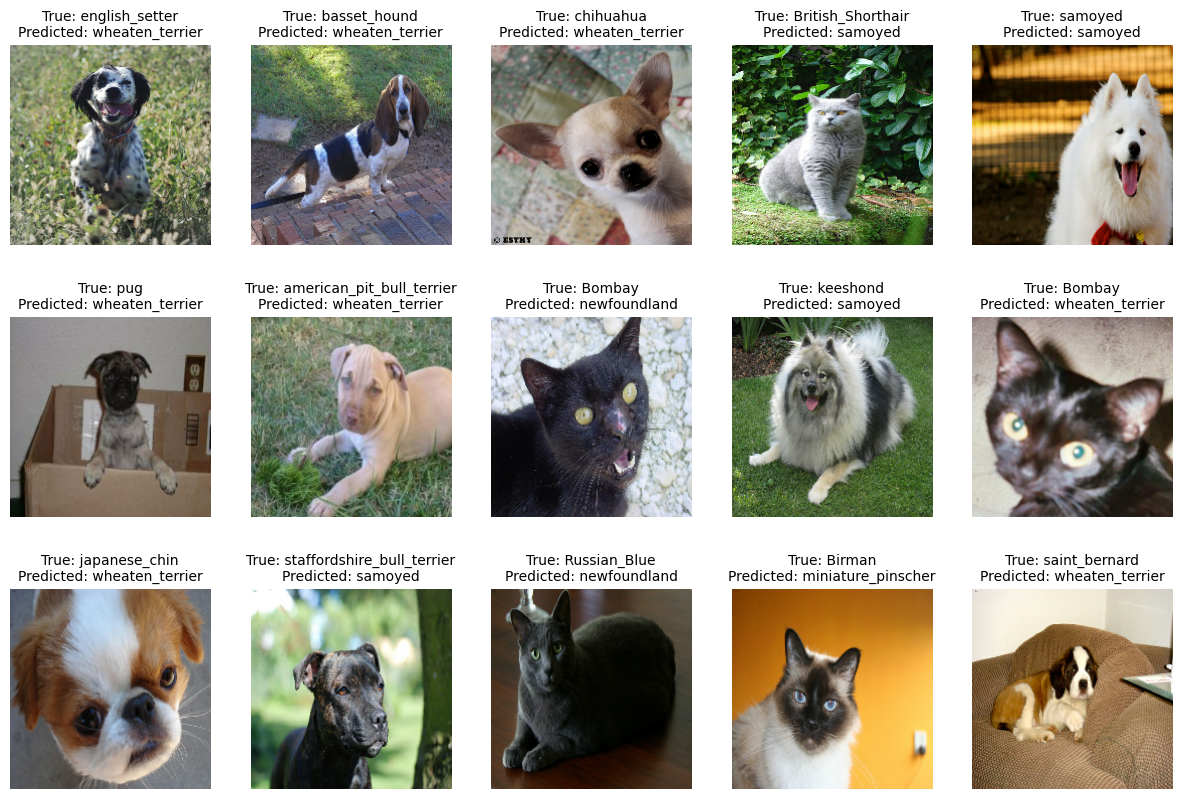

In [74]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on test data
test_loss, test_acc = simple_Model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

# Select 15 random images from the test set
test_images = []
test_labels = []
for image_batch, label_batch in test_dataset:
    for i in range(len(image_batch)):
        test_images.append(image_batch[i])
        test_labels.append(label_batch[i])
random_indices = random.sample(range(len(test_images)), 15)

# Plot the true label, predicted label, and image for each random image in a 3x5 grid
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < len(random_indices):
        # Extract the true label and predicted label for the current image
        true_label = label_Names[np.argmax(test_labels[random_indices[i]])]
        predictions = simple_Model.predict(np.expand_dims(test_images[random_indices[i]], axis=0))
        predicted_label = label_Names[np.argmax(predictions)]

        # Display the image and labels
        ax.imshow(test_images[random_indices[i]].numpy())
        ax.set_title('True: {}\nPredicted: {}'.format(true_label, predicted_label),fontsize=10)
        ax.axis('off')

plt.show()


In [54]:
import matplotlib 
matplotlib.rcParams.update({'font.size':10})
def training_plot(metrics,history):
    f, ax =plt.subplots(1,len(metrics),figsize=(15,10))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Ephochs")
        # ax[idx].set_ylabel(metric,fontweight='bold',fontsize=20)
        ax[idx].plot(history.history['val_' + metric],ls='dashed')
        ax[idx].legend([metric,'val_' + metric],fontsize=20)



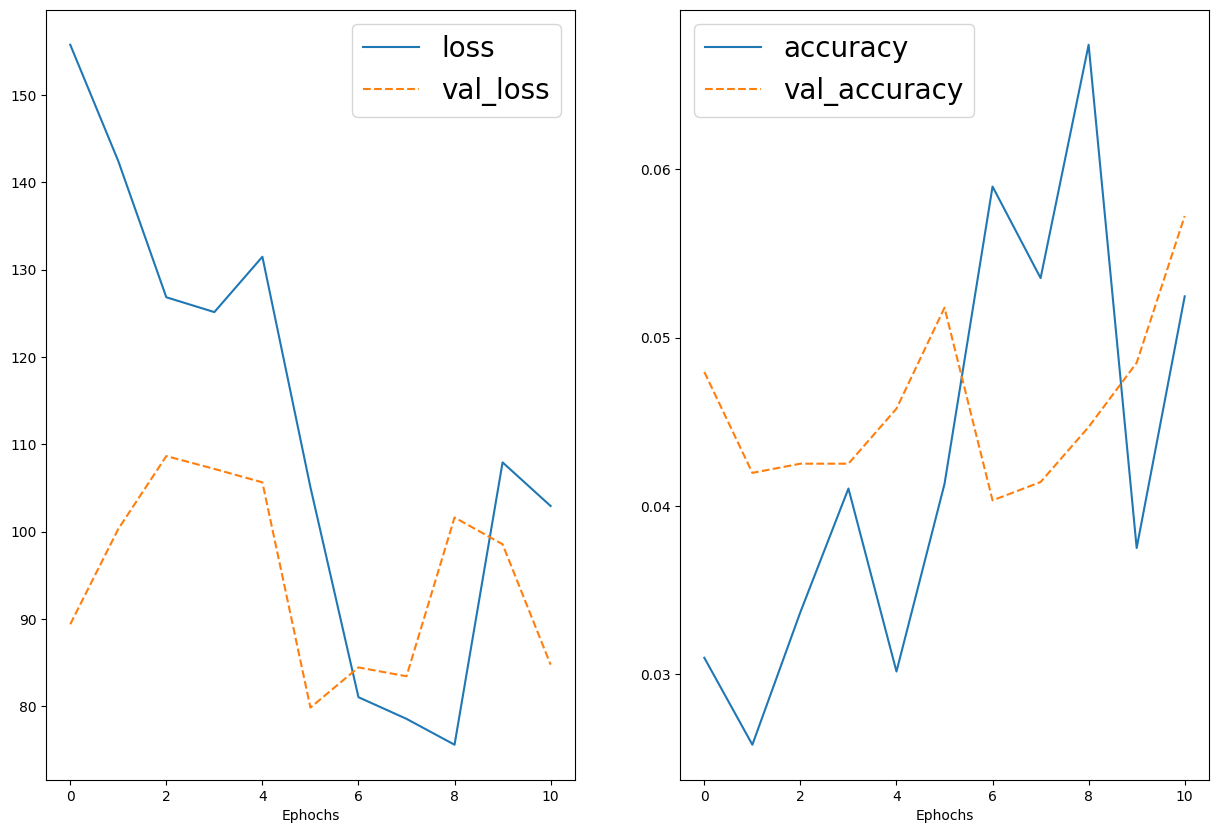

In [55]:
training_plot(['loss','accuracy'],simple_History)

### 2.3 (1 mark)

Try a more complex architecture that has an additional hidden layer with dropout. For this more complex architecture, try various values of parameters including the following: 

- Hidden layer size
- Dropout rate
- Learning rate

For this, use `keras-tuner` and run it with a reasonable choice of possible parameters and report on the optimal parameters and final evaluation results.

In a separate Markdown text cell, justify your choice of potential parameters.

Use the best model obtained here to report the evaluation results on the test data.

In [83]:
import tensorflow as tf
from tensorflow.keras import layers


complex_model = keras.Sequential()

# Add the first hidden layer
complex_model.add(layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
complex_model.add(layers.Dropout(rate=0.2))
complex_model.add(layers.Dense(256, activation='relu'))

# Add the second hidden layer
complex_model.add(layers.Dropout(rate=0.2))
complex_model.add(layers.Dense(128, activation='relu'))

# Add the output layer
complex_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))


# Compile the model
complex_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

complex_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 120000)            0         
                                                                 
 dropout_10 (Dropout)        (None, 120000)            0         
                                                                 
 dense_15 (Dense)            (None, 256)               30720256  
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 37)                4773      
                                                                 
Total params: 30,757,925
Trainable params: 30,757,925


In [ ]:
# Train the model
complex_history = complex_model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

C:\Users\Green\AppData\Local\Temp\ipykernel_9320\1105654841.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [86]:
# Define the hyperparameters search space
def build_model(hp):
    lrate = hp.Float('lrate',1e-4,1e-1,sampling='log')
    num_hidden = hp.Int('num_hidden',32,256,32)
    dropout_rate = hp.Float('dropout',0.0,0.9)

    model = tf.keras.Sequential([
                                 tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
                                 tf.keras.layers.Dense(num_hidden,
                                                       activation=tf.keras.activations.softmax),
                                 tf.keras.layers.Dropout(dropout_rate),
                                 tf.keras.layers.Dense(len(label_Names),
                                                       activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    return model


# Run the hyperparameter tuning
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=3, executions_per_trial=2, directory='tuner_dir', project_name='my_dog_cat_classifier')
tuner.search(train_dataset, validation_data=val_dataset, epochs=10)

# Get the best model from the hyperparameter tuning
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model on the full training data
best_model.fit(train_dataset, epochs=10)

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print('Test accuracy:', test_accuracy)

INFO:tensorflow:Reloading Tuner from tuner_dir\my_dog_cat_classifier\tuner0.json

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
0.0089176         |0.016263          |lrate
256               |96                |num_hidden
0.88231           |0.78734           |dropout

Epoch 1/10
58/58 [==============================] - 15s 255ms/step - loss: 3.6948 - accuracy: 0.0144 - val_loss: 3.6160 - val_accuracy: 0.0272
Epoch 2/10
58/58 [==============================] - 12s 210ms/step - loss: 3.6391 - accuracy: 0.0242 - val_loss: 3.6129 - val_accuracy: 0.0272
Epoch 3/10
58/58 [==============================] - 12s 205ms/step - loss: 3.6356 - accuracy: 0.0239 - val_loss: 3.6121 - val_accuracy: 0.0267
Epoch 4/10
58/58 [==============================] - 13s 222ms/step - loss: 3.6377 - accuracy: 0.0239 - val_loss: 3.6115 - val_accuracy: 0.0272
Epoch 5/10
58/58 [==============================] - 12s 204ms/step - loss: 3.6397 - accuracy: 0.0103 - val_loss: 3.6116 - val_a

KeyboardInterrupt: 

Epoch 1/10
58/58 [==============================] - 14s 239ms/step - loss: 31.6769 - accuracy: 0.0144 - val_loss: 3.6109 - val_accuracy: 0.0267
Epoch 2/10
58/58 [==============================] - 14s 245ms/step - loss: 3.6121 - accuracy: 0.0000e+00 - val_loss: 3.6109 - val_accuracy: 0.0272
Epoch 3/10
58/58 [==============================] - 15s 250ms/step - loss: 3.6122 - accuracy: 2.7174e-04 - val_loss: 3.6108 - val_accuracy: 0.0272
Epoch 4/10
58/58 [==============================] - 14s 245ms/step - loss: 3.6120 - accuracy: 0.0046 - val_loss: 3.6108 - val_accuracy: 0.0272
Epoch 5/10
58/58 [==============================] - 13s 228ms/step - loss: 3.6120 - accuracy: 2.7174e-04 - val_loss: 3.6108 - val_accuracy: 0.0272
Epoch 6/10
58/58 [==============================] - 14s 234ms/step - loss: 3.6119 - accuracy: 0.0274 - val_loss: 3.6108 - val_accuracy: 0.0272
Epoch 7/10
58/58 [==============================] - 14s 243ms/step - loss: 3.6121 - accuracy: 0.0272 - val_loss: 3.6107 - val_acc

KeyboardInterrupt: 

29/29 [==============================] - 2s 68ms/step - loss: 3.6108 - accuracy: 0.0273
Test accuracy: 0.027262814342975616
1/1 [==============================] - 0s 35ms/step


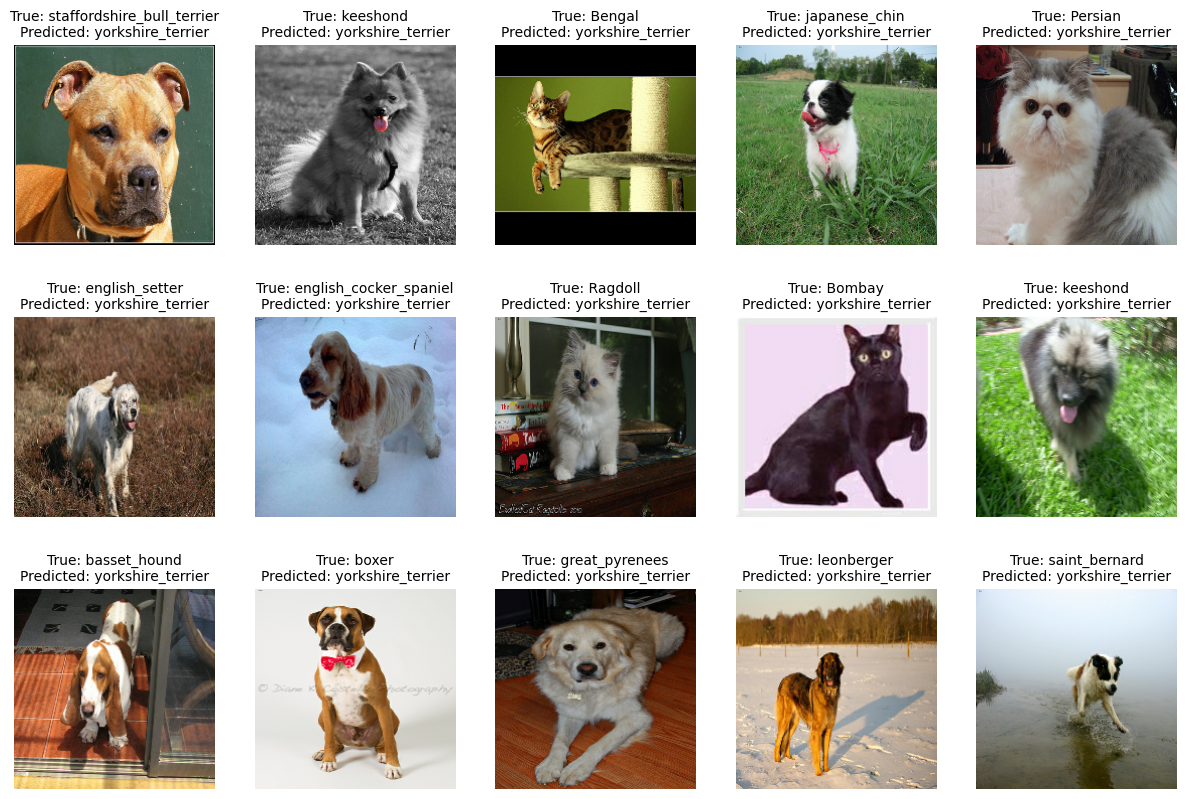

In [85]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on test data
test_loss, test_acc = complex_model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

# Select 15 random images from the test set
test_images = []
test_labels = []
for image_batch, label_batch in test_dataset:
    for i in range(len(image_batch)):
        test_images.append(image_batch[i])
        test_labels.append(label_batch[i])
random_indices = random.sample(range(len(test_images)), 15)

# Plot the true label, predicted label, and image for each random image in a grid
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < len(random_indices):
        # Extract the true label and predicted label for the current image
        true_label = label_Names[np.argmax(test_labels[random_indices[i]])]
        predictions = complex_model.predict(np.expand_dims(test_images[random_indices[i]], axis=0))
        predicted_label = label_Names[np.argmax(predictions)]

        # Display the image and labels
        ax.imshow(test_images[random_indices[i]].numpy())
        ax.set_title('True: {}\nPredicted: {}'.format(true_label, predicted_label),fontsize=10)
        ax.axis('off')

plt.show()


In [62]:
import matplotlib 
matplotlib.rcParams.update({'font.size':10})
def training_plot(metrics,history):
    f, ax =plt.subplots(1,len(metrics),figsize=(15,10))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Ephochs")
        # ax[idx].set_ylabel(metric,fontweight='bold',fontsize=20)
        ax[idx].plot(history.history['val_' + metric],ls='dashed')
        ax[idx].legend([metric,'val_' + metric],fontsize=20)

training_plot(['loss','accuracy'],complex_history)

NameError: name 'complex_history' is not defined

### 2.4 (1 mark)

Conduct error analysis with the best model that you have obtained from the previous experiments. In particular, answer the following questions.
1. What animal breed is easier to detect?
2. What animal breed is more difficult to detect?
3. Display examples of classification errors.
4. Display examples of correct classifications.

In [63]:
# Create empty lists to store data for each test image
true_labels = []
predicted_labels = []
images = []

# Loop through the test dataset and make predictions
for image_batch, label_batch in test_dataset:
    # Make predictions on the batch of images
    predictions = complex_model.predict(image_batch)
    # Loop through each image in the batch
    for i in range(len(image_batch)):
        # Get the true and predicted labels for the current image
        true_label = label_Names[np.argmax(label_batch[i])]
        predicted_label = label_Names[np.argmax(predictions[i])]
        # Append the true and predicted labels and the image data to their respective lists
        true_labels.append(true_label)
        predicted_labels.append(predicted_label)
        images.append(image_batch[i])

# Calculate the accuracy of the model for each breed
breed_accuracy = {}
for breed in label_Names:
    # Get the indices of the images with the current breed as the true label
    breed_indices = [i for i, label in enumerate(true_labels) if label == breed]
    # Get the predicted labels for the images with the current breed as the true label
    breed_predictions = [predicted_labels[i] for i in breed_indices]
    # Calculate the accuracy of the model for the current breed
    accuracy = breed_predictions.count(breed) / len(breed_predictions)
    breed_accuracy[breed] = accuracy

# Sort the breeds by accuracy to determine the easiest and hardest breeds to label
easiest_breed = max(breed_accuracy, key=breed_accuracy.get)
hardest_breed = min(breed_accuracy, key=breed_accuracy.get)

print("Easiest breed to label:", easiest_breed)
print("Hardest breed to label:", hardest_breed)


2/2 [==============================] - 0s 11ms/step
Easiest breed to label: Abyssinian
Hardest breed to label: american_bulldog


## Task 3 (5 marks) - A more complex classifier

Implement a more complex classifier that incorporates convolutions and max pooling. You need to decide an optimal combination of layers and choice of parameters. The task will be composed of the following subtasks.

### 3.1 (2 marks)

Implement a model that includes a sequence of two `Conv2D`, each one followed with `MaxPooling2D`. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation), based on what we have seen in the lectures.

Train the model with the training data and use the validation data to determine when to stop training. Determine whether and when it is overfitting, and report on the evaluation results with the test data.

In [68]:
more_Complex_Model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,  3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])


In [71]:
more_Complex_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
more_Complex_History = more_Complex_Model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 37) and (None, 2) are incompatible


In [ ]:
training_plot(['loss','accuracy'],more_Complex_History)

In [ ]:
test_loss, test_acc = more_Complex_Model.evaluate(test_dataset)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


### 3.2 (1 mark)

Try to improve on the above results by using a more complex architecture of your choice. In your solution, you must design the architecture from scratch (do not use a pre-trained model). Comment on the results. Compare with the best model of task 2.

In [ ]:
even_More_Complex_Model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [ ]:
even_More_Complex_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
even_More_Complex_History = even_More_Complex_Model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])


In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(even_More_Complex_History.history['loss'], label='training')
plt.plot(even_More_Complex_History.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(even_More_Complex_History.history['accuracy'], label='training')
plt.plot(even_More_Complex_History.history['val_accuracy'], label='validation')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = even_More_Complex_Model.evaluate(test_dataset)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


### 3.3 (1 mark)

Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. During training, make sure that you freeze the pre-trained weights. Make sure that you use a reasonable schedule for the learning rate. Evaluate and compare with other systems.

In [ ]:
from tensorflow.keras.applications import MobileNet

# Load the MobileNet model pre-trained on imagenet
base_model = MobileNet(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')

# Freeze the pre-trained weights
base_model.trainable = False

# Add the classification layer
pre_Train_Model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
pre_Train_Model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))

# Create the learning rate callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model
history = pre_Train_Model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=[lr_callback])

# Evaluate the model on the test dataset
test_loss, test_acc = pre_Train_Model.evaluate(test_dataset)
print('Test accuracy:', test_acc)


### 3.4 (1 mark)

Add a data augmentation stage to the model implemented in 3.3 and compare results vs. 3.3. In a Markdown text cell, justify the choice of data augmentation layers and their parameters.

In [ ]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    zoom_range=0.2,     # Randomly zoom images by up to 20%
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # Randomly shift images vertically by up to 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    brightness_range=(0.8, 1.2),  # Randomly adjust brightness by up to 20%
    fill_mode='reflect'  # Fill any missing pixels with reflected image content
)


# Coding (1 mark)

This mark will be assigned to submissions that have clean and efficient code and good in-code documentation of all code presented in this assignment.

# GitHub Classroom (1 mark)

These marks will be given to submissions that:

- Have continuously committed changes to the GitHub repository at GitHub Classroom.
- The commit messages are useful and informative.


# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

## A note on the use of AI code generators

In this assignment, we view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools. If you choose to use them, make the following explicit:
- What part of your code is based on the output of such tools, 
- What tools you used,
- What prompts you used to generate the code, and
- What modifications you made on the generated code.

This will help us assess your work fairly.